<a href="https://colab.research.google.com/github/LEVIII007/Sign-Language-To-Text-and-Speech-Conversion/blob/master/sign_lang_pred_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=c243e7dd492d10b24335799cddce96e1ea072fbca1934f5304c671ae0a68f183
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [3]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 34.1 MB/s eta 0:00:00


Image with lines and dots saved to hand_with_lines_and_dots_1.png


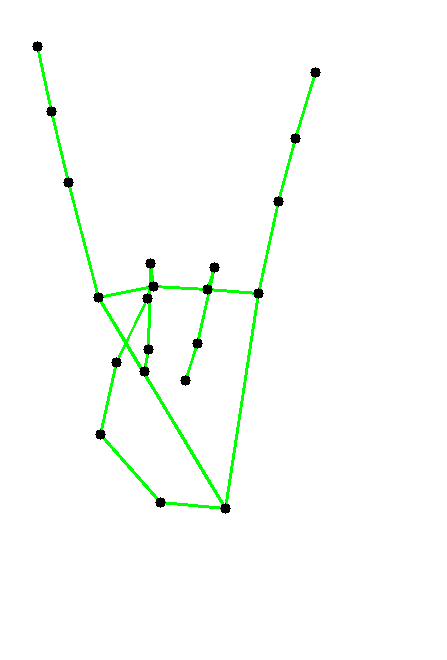

In [36]:
import cv2
import mediapipe as mp
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Install cvzone and mediapipe if not already installed
# !pip install cvzone mediapipe

# Initialize the HandDetector
hand_detector = HandDetector(detectionCon=0.8, maxHands=1)

# Initialize the Mediapipe Hand module
mp_hands = mp.solutions.hands
hands_module = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.8)

# Load the image
image_path = 'second.jpeg'
original_image = cv2.imread(image_path)
image = original_image.copy()

# Detect hands in the image using HandDetector
hands, _ = hand_detector.findHands(image)

# Extract and save cropped images of detected hands
if hands:
    for hand_index, hand in enumerate(hands):
        # Extract bounding box coordinates
        x, y, w, h = hand['bbox']

        # Crop the detected hand from the original image
        cropped_hand = original_image[y-50:y + h + 50, x-50:x + w + 50]

        # Convert the cropped hand to Mediapipe Hand landmarks
        rgb_cropped_hand = cv2.cvtColor(cropped_hand, cv2.COLOR_BGR2RGB)
        results = hands_module.process(rgb_cropped_hand)

        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                # Draw connecting lines with green color and highlight landmark points with dots on a white background
                white_background = np.ones_like(cropped_hand) * 255
                for connection in mp_hands.HAND_CONNECTIONS:
                    point1 = tuple(np.multiply([landmarks.landmark[connection[0]].x, landmarks.landmark[connection[0]].y], [w, h]).astype(int))
                    point2 = tuple(np.multiply([landmarks.landmark[connection[1]].x, landmarks.landmark[connection[1]].y], [w, h]).astype(int))
                    cv2.line(white_background, point1, point2, (0, 255, 0), 2)  # Green color for connecting lines

                for landmark in landmarks.landmark:
                    point = tuple(np.multiply([landmark.x, landmark.y], [w, h]).astype(int))
                    cv2.circle(white_background, point, 5, (0, 0, 0), cv2.FILLED)

                # Save or process the image with connecting lines and highlighted dots on a white background
                save_path = f'hand_with_lines_and_dots_{hand_index+1}.png'
                cv2.imwrite(save_path, white_background)
                print(f"Image with lines and dots saved to {save_path}")

                # Display the image with connecting lines and dots using cv2_imshow
                cv2_imshow(white_background)

# Display the original image with bounding boxes
# cv2_imshow(image)

desired_width = 400
desired_height = 400

# Resize the image using cv2.resize
resized_image = cv2.resize(white_background, (desired_width, desired_height))
cv2_imshow(resized_image)


height, width, channels = white_background.shape

# Print the dimensions
print("Image Dimensions:")
print(f"Height: {height} pixels")
print(f"Width: {width} pixels")
print(f"Number of Channels: {channels}")

img = img / 255.0  # Normalize the image to values between 0 and 1

import math
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
from keras.models import load_model
import traceback

model = load_model('cnn8grps_rad1_model.h5')
prob = np.array(model.predict(img)[0], dtype='float32')
print(prob)



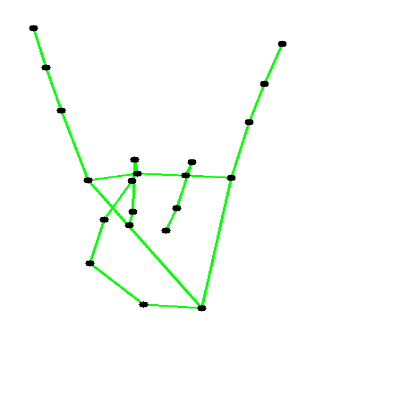

In [43]:
desired_width = 400
desired_height = 400

# Resize the image using cv2.resize
resized_image = cv2.resize(white_background, (desired_width, desired_height))
cv2_imshow(resized_image)


In [38]:
height, width, channels = white_background.shape

# Print the dimensions
print("Image Dimensions:")
print(f"Height: {height} pixels")
print(f"Width: {width} pixels")
print(f"Number of Channels: {channels}")

Image Dimensions:
Height: 660 pixels
Width: 447 pixels
Number of Channels: 3


In [46]:
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize the image to values between 0 and 1

# Ensure the correct input shape for the model
if img.shape[3] == 1:
    img = np.concatenate((img, img, img), axis=-1)

In [49]:
import math
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
from keras.models import load_model
import traceback

model = load_model('cnn8grps_rad1_model.h5')
prob = np.array(model.predict(img), dtype='float32')
print(prob)
prob = np.array(model.predict(img)[0], dtype='float32')
print(prob)

1/1 [==============================] - 0s 166ms/step
[[0.02936871 0.05186336 0.06438889 0.0226788  0.48406902 0.05162387
  0.25358555 0.04242183]]
1/1 [==============================] - 0s 22ms/step
[0.02936871 0.05186336 0.06438889 0.0226788  0.48406902 0.05162387
 0.25358555 0.04242183]


In [24]:
wimport math
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
from keras.models import load_model
import traceback

model = load_model('cnn8grps_rad1_model.h5')
white = np.ones((400, 400), np.uint8) * 255
cv2.imwrite("white.jpg", white)      # image bnai white puri

# image_path = 'first.jpeg'

# # Load the image from file
# capture = cv2.imread(image_path)

# # capture = cv2.VideoCapture(0)

# hd = HandDetector(maxHands=1)
# hd2 = HandDetector(maxHands=1)

# offset = 29
# step = 1
# flag = False
# suv = 0


# def distance(x, y):
#     return math.sqrt(((x[0] - y[0]) ** 2) + ((x[1] - y[1]) ** 2))


# def distance_3d(x, y):
#     return math.sqrt(((x[0] - y[0]) ** 2) + ((x[1] - y[1]) ** 2) + ((x[2] - y[2]) ** 2))


# bfh = 0
# dicttt=dict()
# count=0
# kok=[]

# while True:
#     try:
#         _, frame = capture.read()
#         frame = cv2.flip(frame, 1)
#         hands = hd.findHands(frame, draw=False, flipType=True)
#         print(frame.shape)
#         if hands:
#             # #print(" --------- lmlist=",hands[1])
#             hand = hands[0]
#             x, y, w, h = hand['bbox']
#             image = frame[y - offset:y + h + offset, x - offset:x + w + offset]
#             white = cv2.imread("white.jpg")
#             # img_final=img_final1=img_final2=0
#             handz = hd2.findHands(image, draw=False, flipType=True)
#             if handz:
#                 hand = handz[0]
#                 pts = hand['lmList']
#                 # x1,y1,w1,h1=hand['bbox']

#                 os = ((400 - w) // 2) - 15
#                 os1 = ((400 - h) // 2) - 15
#                 for t in range(0, 4, 1):
#                     cv2.line(white, (pts[t][0] + os, pts[t][1] + os1), (pts[t + 1][0] + os, pts[t + 1][1] + os1),
#                              (0, 255, 0), 3)
#                 for t in range(5, 8, 1):
#                     cv2.line(white, (pts[t][0] + os, pts[t][1] + os1), (pts[t + 1][0] + os, pts[t + 1][1] + os1),
#                              (0, 255, 0), 3)
#                 for t in range(9, 12, 1):
#                     cv2.line(white, (pts[t][0] + os, pts[t][1] + os1), (pts[t + 1][0] + os, pts[t + 1][1] + os1),
#                              (0, 255, 0), 3)
#                 for t in range(13, 16, 1):
#                     cv2.line(white, (pts[t][0] + os, pts[t][1] + os1), (pts[t + 1][0] + os, pts[t + 1][1] + os1),
#                              (0, 255, 0), 3)
#                 for t in range(17, 20, 1):
#                     cv2.line(white, (pts[t][0] + os, pts[t][1] + os1), (pts[t + 1][0] + os, pts[t + 1][1] + os1),
#                              (0, 255, 0), 3)
#                 cv2.line(white, (pts[5][0] + os, pts[5][1] + os1), (pts[9][0] + os, pts[9][1] + os1), (0, 255, 0),
#                          3)
#                 cv2.line(white, (pts[9][0] + os, pts[9][1] + os1), (pts[13][0] + os, pts[13][1] + os1), (0, 255, 0),
#                          3)
#                 cv2.line(white, (pts[13][0] + os, pts[13][1] + os1), (pts[17][0] + os, pts[17][1] + os1),
#                          (0, 255, 0), 3)
#                 cv2.line(white, (pts[0][0] + os, pts[0][1] + os1), (pts[5][0] + os, pts[5][1] + os1), (0, 255, 0),
#                          3)
#                 cv2.line(white, (pts[0][0] + os, pts[0][1] + os1), (pts[17][0] + os, pts[17][1] + os1), (0, 255, 0),
#                          3)

#                 for i in range(21):
#                     cv2.circle(white, (pts[i][0] + os, pts[i][1] + os1), 2, (0, 0, 255), 1)

#                 cv2.imshow("2", white)
                # cv2.imshow("5", skeleton5)

                # #print(model.predict(img))

                # white = white.reshape(1, 400, 400, 3)
                prob = np.array(model.predict(white_background)[0], dtype='float32')
                ch1 = np.argmax(prob, axis=0)
                prob[ch1] = 0
                ch2 = np.argmax(prob, axis=0)
                prob[ch2] = 0
                ch3 = np.argmax(prob, axis=0)
                prob[ch3] = 0


                pl = [ch1, ch2]

                #condition for [Aemnst]
                l=[[5,2],[5,3],[3,5],[3,6],[3,0],[3,2],[6,4],[6,1],[6,2],[6,6],[6,7],[6,0],[6,5],[4,1],[1,0],[1,1],[6,3],[1,6],[5,6],[5,1],[4,5],[1,4],[1,5],[2,0],[2,6],[4,6],[1,0],[5,7],[1,6],[6,1],[7,6],[2,5],[7,1],[5,4],[7,0],[7,5],[7,2]]
                if pl in l:
                    if (pts[6][1] < pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] <pts[20][1]):
                        ch1=0
                        #print("00000")

                #condition for [o][s]
                l=[[2,2],[2,1]]
                if pl in l:
                    if (pts[5][0] < pts[4][0] ):
                        ch1=0
                        print("++++++++++++++++++")
                        #print("00000")



                #condition for [c0][aemnst]
                l=[[0,0],[0,6],[0,2],[0,5],[0,1],[0,7],[5,2],[7,6],[7,1]]
                pl=[ch1,ch2]
                if pl in l:
                    if (pts[0][0]>pts[8][0] and pts[0][0]>pts[4][0] and pts[0][0]>pts[12][0] and pts[0][0]>pts[16][0] and pts[0][0]>pts[20][0]) and pts[5][0] > pts[4][0]:
                        ch1=2
                        #print("22222")

                # condition for [c0][aemnst]
                l = [[6,0],[6,6],[6,2]]
                pl = [ch1, ch2]
                if pl in l:
                    if distance(pts[8],pts[16])<52:
                        ch1 = 2
                        #print("22222")


                ##print(pts[2][1]+15>pts[16][1])
                # condition for [gh][bdfikruvw]
                l = [[1,4],[1,5],[1,6],[1,3],[1,0]]
                pl = [ch1, ch2]

                if pl in l:
                    if pts[6][1] > pts[8][1] and pts[14][1] < pts[16][1] and pts[18][1]<pts[20][1] and pts[0][0]<pts[8][0] and pts[0][0]<pts[12][0] and pts[0][0]<pts[16][0] and pts[0][0]<pts[20][0]:
                        ch1 = 3
                        print("33333c")


                #con for [gh][l]
                l=[[4,6],[4,1],[4,5],[4,3],[4,7]]
                pl=[ch1,ch2]
                if pl in l:
                    if pts[4][0]>pts[0][0]:
                        ch1=3
                        print("33333b")

                # con for [gh][pqz]
                l = [[5, 3],[5,0],[5,7], [5, 4], [5, 2],[5,1],[5,5]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[2][1]+15<pts[16][1]:
                        ch1 = 3
                        print("33333a")

                # con for [l][x]
                l = [[6, 4], [6, 1], [6, 2]]
                pl = [ch1, ch2]
                if pl in l:
                    if distance(pts[4],pts[11])>55:
                        ch1 = 4
                        #print("44444")

                # con for [l][d]
                l = [[1, 4], [1, 6],[1,1]]
                pl = [ch1, ch2]
                if pl in l:
                    if (distance(pts[4], pts[11]) > 50) and (pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] <pts[20][1]):
                        ch1 = 4
                        #print("44444")

                # con for [l][gh]
                l = [[3, 6], [3, 4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[4][0]<pts[0][0]):
                        ch1 = 4
                        #print("44444")

                # con for [l][c0]
                l = [[2, 2], [2, 5],[2,4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[1][0] < pts[12][0]):
                        ch1 = 4
                        #print("44444")

                # con for [l][c0]
                l = [[2, 2], [2, 5], [2, 4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[1][0] < pts[12][0]):
                        ch1 = 4
                        #print("44444")

                # con for [gh][z]
                l = [[3, 6],[3,5],[3,4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] <pts[20][1]) and pts[4][1]>pts[10][1]:
                        ch1 = 5
                        print("55555b")



                # con for [gh][pq]
                l = [[3,2],[3,1],[3,6]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[4][1]+17>pts[8][1] and pts[4][1]+17>pts[12][1] and pts[4][1]+17>pts[16][1] and pts[4][1]+17>pts[20][1]:
                        ch1 = 5
                        print("55555a")

                # con for [l][pqz]
                l = [[4,4],[4,5],[4,2],[7,5],[7,6],[7,0]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[4][0]>pts[0][0]:
                        ch1 = 5
                        #print("55555")

                # con for [pqz][aemnst]
                l = [[0, 2],[0,6],[0,1],[0,5],[0,0],[0,7],[0,4],[0,3],[2,7]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[0][0]<pts[8][0]  and  pts[0][0]<pts[12][0]  and pts[0][0]<pts[16][0]  and pts[0][0]<pts[20][0]:
                        ch1 = 5
                        #print("55555")



                # con for [pqz][yj]
                l = [[5, 7],[5,2],[5,6]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[3][0]<pts[0][0]:
                        ch1 = 7
                        #print("77777")

                # con for [l][yj]
                l = [[4, 6],[4,2],[4,4],[4,1],[4,5],[4,7]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[6][1] < pts[8][1]:
                        ch1 = 7
                        #print("77777")

                # con for [x][yj]
                l = [[6, 7],[0,7],[0,1],[0,0],[6,4],[6,6] ,[6,5],[6,1]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[18][1] > pts[20][1]:
                        ch1 = 7
                        #print("77777")


                # condition for [x][aemnst]
                l = [[0,4],[0,2],[0,3],[0,1],[0,6]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[5][0]>pts[16][0]:
                        ch1 = 6
                        #print("66666")

                # condition for [yj][x]
                l = [[7, 2]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[18][1] < pts[20][1]:
                        ch1 = 6
                        #print("66666")


                # condition for [c0][x]
                l = [[2, 1],[2,2],[2,6],[2,7],[2,0]]
                pl = [ch1, ch2]
                if pl in l:
                    if distance(pts[8],pts[16])>50:
                        ch1 = 6
                        #print("66666")

                # con for [l][x]

                l = [[4, 6],[4,2],[4,1],[4,4]]
                pl = [ch1, ch2]
                if pl in l:
                    if distance(pts[4], pts[11]) < 60:
                        ch1 = 6
                        #print("66666")

                #con for [x][d]
                l = [[1,4],[1,6],[1,0],[1,2]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[5][0] - pts[4][0] - 15 > 0:
                        ch1 = 6


                # con for [b][pqz]
                l = [[5,0],[5,1],[5,4],[5,5],[5,6],[6,1],[7,6],[0,2],[7,1],[7,4],[6,6],[7,2],[5,0],[6,3],[6,4],[7,5],[7,2]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and pts[18][1] > pts[20][1]):
                        ch1 = 1
                        print("111111")


                # con for [f][pqz]
                l = [[6, 1],[6,0],[0,3],[6,4],[2,2], [0,6],[6,2],[7, 6],[4,6],[4,1],[4,2], [0, 2], [7, 1], [7, 4], [6, 6], [7, 2], [7, 5], [7, 2]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[6][1] < pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and
                                    pts[18][1] > pts[20][1]):
                        ch1 = 1
                        print("111112")

                l = [[6, 1], [6, 0],[4,2],[4,1],[4,6],[4,4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and
                            pts[18][1] > pts[20][1]):
                        ch1 = 1
                        print("111112")

                # con for [d][pqz]
                fg=19
                #print("_________________ch1=",ch1," ch2=",ch2)
                l = [[5,0],[3,4],[3,0],[3,1],[3,5],[5,5],[5,4],[5,1],[7,6]]
                pl = [ch1, ch2]
                if pl in l:
                    if ((pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and
                                    pts[18][1] < pts[20][1]) and (pts[2][0]<pts[0][0]) and pts[4][1]>pts[14][1]):
                        ch1 = 1
                        print("111113")

                l = [ [4, 1], [4, 2],[4, 4]]
                pl = [ch1, ch2]
                if pl in l:
                    if (distance(pts[4], pts[11]) < 50) and (pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] < pts[20][1]):
                        ch1 = 1
                        print("1111993")



                l = [[3, 4], [3, 0], [3, 1], [3, 5],[3,6]]
                pl = [ch1, ch2]
                if pl in l:
                    if ((pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and
                         pts[18][1] < pts[20][1]) and (pts[2][0] < pts[0][0]) and pts[14][1]<pts[4][1]):
                        ch1 = 1
                        print("1111mmm3")

                l = [[6, 6],[6, 4], [6, 1],[6,2]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[5][0]-pts[4][0]-15<0:
                        ch1 = 1
                        print("1111140")



                # con for [i][pqz]
                l = [[5,4],[5,5],[5,1],[0,3],[0,7],[5,0],[0,2],[6,2],[7, 5], [7, 1], [7, 6], [7, 7]]
                pl = [ch1, ch2]
                if pl in l:
                    if ((pts[6][1] < pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and
                                 pts[18][1] > pts[20][1])):
                        ch1 = 1
                        print("111114")

                # con for [yj][bfdi]
                l = [[1,5],[1,7],[1,1],[1,6],[1,3],[1,0]]
                pl = [ch1, ch2]
                if pl in l:
                    if (pts[4][0]<pts[5][0]+15) and ((pts[6][1] < pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and
                                 pts[18][1] > pts[20][1])):
                        ch1 = 7
                        print("111114lll;;p")

                #con for [uvr]
                l = [[5,5],[5,0],[5,4],[5,1],[4,6],[4,1],[7,6],[3,0],[3,5]]
                pl = [ch1, ch2]
                if pl in l:
                    if ((pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] < pts[16][1] and
                         pts[18][1] < pts[20][1])) and pts[4][1]>pts[14][1]:
                        ch1 = 1
                        print("111115")



                # con for [w]
                fg=13
                l = [[3,5],[3,0],[3,6],[5,1],[4,1],[2,0],[5,0],[5,5]]
                pl = [ch1, ch2]
                if pl in l:
                    if not(pts[0][0]+fg < pts[8][0] and pts[0][0]+fg < pts[12][0] and pts[0][0]+fg < pts[16][0]  and pts[0][0]+fg < pts[20][0]) and not(pts[0][0] > pts[8][0] and pts[0][0] > pts[12][0] and pts[0][0] > pts[16][0]  and pts[0][0] > pts[20][0]) and distance(pts[4], pts[11]) < 50:
                        ch1 = 1
                        print("111116")

                # con for [w]

                l = [ [5, 0], [5, 5],[0,1]]
                pl = [ch1, ch2]
                if pl in l:
                    if pts[6][1]>pts[8][1] and pts[10][1]>pts[12][1] and pts[14][1]>pts[16][1]:
                        ch1 = 1
                        print("1117")



                #-------------------------condn for 8 groups  ends



                #-------------------------condn for subgroups  starts
                #
                if ch1 == 0:
                    ch1='S'
                    if pts[4][0] < pts[6][0] and pts[4][0] < pts[10][0] and pts[4][0] < pts[14][0] and pts[4][0] < pts[18][0]:
                        ch1 = 'A'
                    if pts[4][0] > pts[6][0] and pts[4][0] < pts[10][0] and pts[4][0] < pts[14][0] and pts[4][0] < pts[18][0] and pts[4][1] < pts[14][1] and pts[4][1] < pts[18][1] :
                        ch1 = 'T'
                    if pts[4][1] > pts[8][1] and pts[4][1] > pts[12][1] and pts[4][1] > pts[16][1] and pts[4][1] > pts[20][1]:
                        ch1 = 'E'
                    if pts[4][0] > pts[6][0] and pts[4][0] > pts[10][0] and pts[4][0] > pts[14][0] and  pts[4][1] < pts[18][1]:
                        ch1 = 'M'
                    if pts[4][0] > pts[6][0] and pts[4][0] > pts[10][0]  and  pts[4][1] < pts[18][1] and pts[4][1] < pts[14][1]:
                        ch1 = 'N'


                if ch1 == 2:
                    if distance(pts[12], pts[4]) > 42:
                        ch1 = 'C'
                    else:
                        ch1 = 'O'

                if ch1 == 3:
                    if (distance(pts[8], pts[12])) > 72:
                        ch1 = 'G'
                    else:
                        ch1 = 'H'

                if ch1 == 7:
                    if distance(pts[8], pts[4]) > 42:
                        ch1 = 'Y'
                    else:
                        ch1 = 'J'

                if ch1 == 4:
                    ch1 = 'L'

                if ch1 == 6:
                    ch1 = 'X'

                if ch1 == 5:
                    if pts[4][0] > pts[12][0] and pts[4][0] > pts[16][0] and pts[4][0] > pts[20][0]:
                        if pts[8][1] < pts[5][1]:
                            ch1 = 'Z'
                        else:
                            ch1 = 'Q'
                    else:
                        ch1 = 'P'

                if ch1 == 1:
                    if (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and pts[18][1] >pts[20][1]):
                        ch1 = 'B'
                    if (pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] <pts[20][1]):
                        ch1 = 'D'
                    if (pts[6][1] < pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and pts[18][1] > pts[20][1]):
                        ch1 = 'F'
                    if (pts[6][1] < pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] > pts[20][1]):
                        ch1 = 'I'
                    if (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] > pts[16][1] and pts[18][1] < pts[20][1]):
                        ch1 = 'W'
                    if  (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] < pts[20][1]) and pts[4][1]<pts[9][1]:
                        ch1 = 'K'
                    if ((distance(pts[8], pts[12]) - distance(pts[6], pts[10])) < 8) and (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] < pts[20][1]):
                        ch1 = 'U'
                    if ((distance(pts[8], pts[12]) - distance(pts[6], pts[10])) >= 8) and (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] < pts[20][1]) and (pts[4][1] >pts[9][1]):
                        ch1 = 'V'

                    if (pts[8][0] > pts[12][0]) and (pts[6][1] > pts[8][1] and pts[10][1] > pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] < pts[20][1]):
                        ch1 = 'R'

                if ch1== 1 or 'E' or 'S' or 'X' or 'Y' or 'B':
                    if (pts[6][1] > pts[8][1] and pts[10][1] < pts[12][1] and pts[14][1] < pts[16][1] and pts[18][1] > pts[20][1]):
                        ch1 = 'Space'

                if ch1== 'E' or 'Y' or 'B':
                    if (pts[4][0] < pts[5][0] ):
                        ch1 = 'Next'

                if ch1== 'Next' or 'B' or 'C' or 'H' or 'F':
                    if (pts[0][0] > pts[8][0] and pts[0][0] > pts[12][0] and pts[0][0] > pts[16][0] and pts[0][0] > pts[20][0]) and pts[4][1]<pts[8][1] and pts[4][1]<pts[12][1] and pts[4][1]<pts[16][1] and pts[4][1]<pts[20][1]:
                        ch1 = 'Backspace'

                print("ch1=", ch1, " ch2=", ch2, " ch3=", ch3)
                kok.append(ch1)

                # # [0->aemnst][1->bfdiuvwkr][2->co][3->gh][4->l][5->pqz][6->x][7->yj]
                if ch1 != 1:
                    if (ch1,ch2) in dicttt:
                        dicttt[(ch1,ch2)] += 1
                    else:
                        dicttt[(ch1,ch2)] = 1

                frame = cv2.putText(frame, "Predicted " + str(ch1), (30, 80),
                                    cv2.FONT_HERSHEY_SIMPLEX,
                                    3, (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow("frame", frame)
        interrupt = cv2.waitKey(1)
        if interrupt & 0xFF == 27:
            # esc key
            break


    except Exception:
        print("==", traceback.format_exc())



dicttt = {key: val for key, val in sorted(dicttt.items(), key = lambda ele: ele[1], reverse = True)}
print(dicttt)
print(set(kok))
capture.release()
cv2.destroyAllWindows()



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 524)

In [8]:
import math
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
from keras.models import load_model
import traceback

model = load_model('cnn8grps_rad1_model.h5')
white = np.ones((400, 400), np.uint8) * 255
cv2.imwrite("white.jpg", white)      # image bnai white puri

image_path = 'first.jpeg'

# Load the image from file
capture = cv2.imread(image_path)
cv2.imshow('Image', capture)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [15]:
from google.colab.patches import cv2_imshow
import cv2

# Specify the path to the image file
image_path = 'first.jpeg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using cv2_imshow
cv2_imshow(image_rgb)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Image with lines and dots saved to hand_with_lines_and_dots_1.png


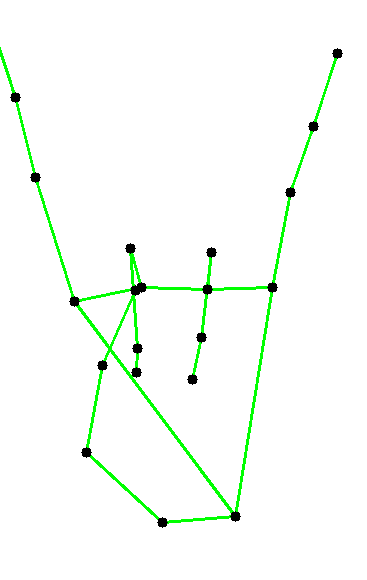

In [16]:
import cv2
import mediapipe as mp
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Install cvzone and mediapipe if not already installed
# !pip install cvzone mediapipe

# Initialize the HandDetector
hand_detector = HandDetector(detectionCon=0.8, maxHands=1)

# Initialize the Mediapipe Hand module
mp_hands = mp.solutions.hands
hands_module = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.8)

# Load the image
image_path = 'second.jpeg'
original_image = cv2.imread(image_path)
image = original_image.copy()

# Detect hands in the image using HandDetector
hands, _ = hand_detector.findHands(image)

# Extract and save cropped images of detected hands
if hands:
    for hand_index, hand in enumerate(hands):
        # Extract bounding box coordinates
        x, y, w, h = hand['bbox']

        # Crop the detected hand from the original image
        cropped_hand = original_image[y:y + h + 20, x:x + w + 20]

        # Convert the cropped hand to Mediapipe Hand landmarks
        rgb_cropped_hand = cv2.cvtColor(cropped_hand, cv2.COLOR_BGR2RGB)
        results = hands_module.process(rgb_cropped_hand)

        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                # Draw connecting lines with green color and highlight landmark points with dots on a white background
                white_background = np.ones_like(cropped_hand) * 255
                for connection in mp_hands.HAND_CONNECTIONS:
                    point1 = tuple(np.multiply([landmarks.landmark[connection[0]].x, landmarks.landmark[connection[0]].y], [w, h]).astype(int))
                    point2 = tuple(np.multiply([landmarks.landmark[connection[1]].x, landmarks.landmark[connection[1]].y], [w, h]).astype(int))
                    cv2.line(white_background, point1, point2, (0, 255, 0), 2)  # Green color for connecting lines

                for landmark in landmarks.landmark:
                    point = tuple(np.multiply([landmark.x, landmark.y], [w, h]).astype(int))
                    cv2.circle(white_background, point, 5, (0, 0, 0), cv2.FILLED)

                # Save or process the image with connecting lines and highlighted dots on a white background
                save_path = f'hand_with_lines_and_dots_{hand_index+1}.png'
                cv2.imwrite(save_path, white_background)
                print(f"Image with lines and dots saved to {save_path}")

                # Display the image with connecting lines and dots using cv2_imshow
                cv2_imshow(white_background)

# Display the original image with bounding boxes
# cv2_imshow(image)
